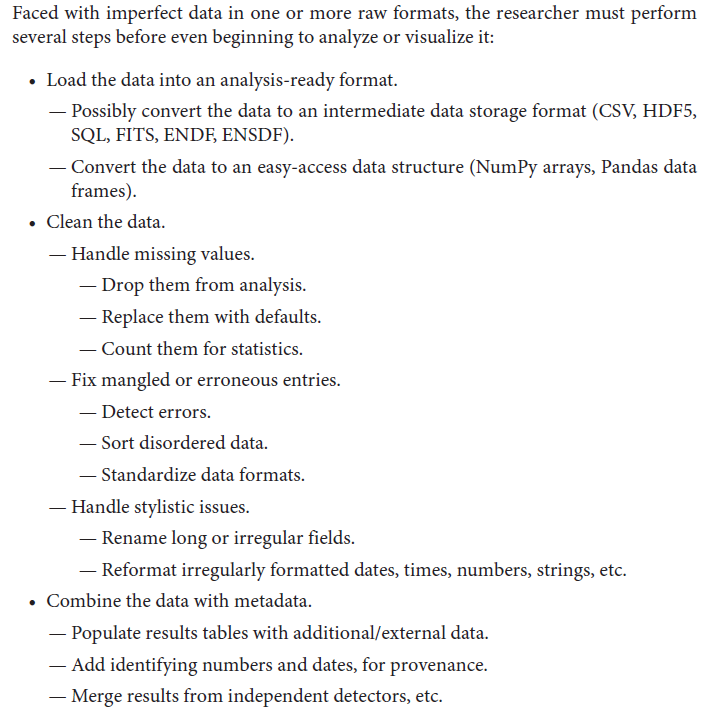


#### Metadata
Metadata is data about data. It is important to include metadata because the results
produced by an experiment or a simulation sometimes fail to capture all of its
features.

In an experiment, detector parameters, the date of the experiment, background radiation
readings from another detector, and more. can all affect the interpretation of
results, but these factors may not have been captured in the experimental data output
stream. They can instead be captured in the metadata.

Metadata is not limited to experimentation, however. Metadata that may affect the
interpretation of the results of a simulation include simulation ID numbers, library
dependency version numbers, input file content, and more.

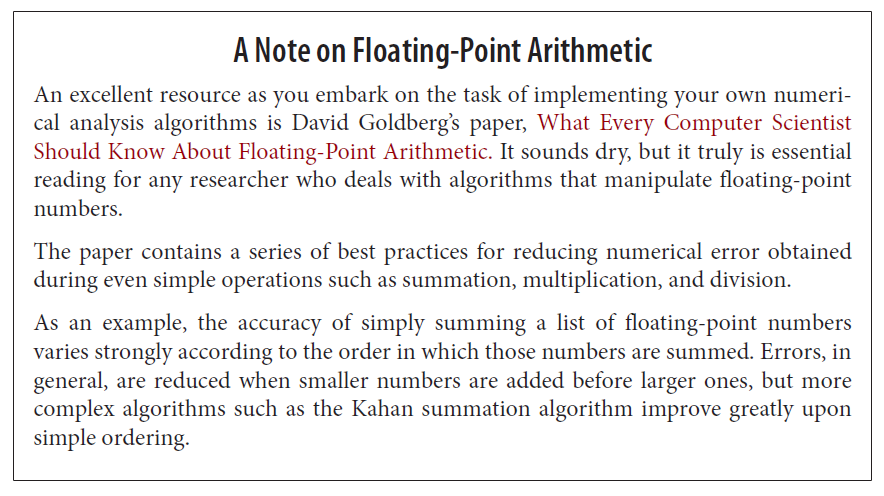

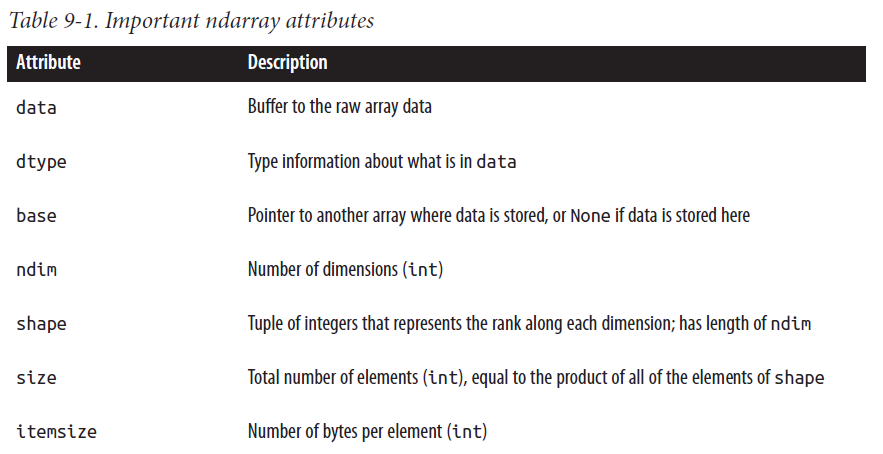

A common method of **reshaping an existing array** is to assign a new tuple of integers
to the shape attribute. This will change the shape in-place. For example:

NumPy also provides a np.reshape() function that you can call with an array argument.
However, this returns a reshaped copy of the original array. This is one of the
central patterns of NumPy: **operations that involve attributes or methods of ndarray
occur in-place, while functions that take an ndarray as an argument return a modified
copy.**

In [ ]:
import numpy as np

a = np.arange(4)
a.shape = (2, 2)